In [2]:
!ls

sample_data  sign-language-mnist.zip


In [3]:
!unzip sign-language-mnist.zip

Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [4]:
!ls

american_sign_language.PNG  sample_data		     sign_mnist_test.csv
amer_sign2.png		    sign-language-mnist.zip  sign_mnist_train
amer_sign3.png		    sign_mnist_test	     sign_mnist_train.csv


![](https://qualityansweringservice.com/wp-content/uploads/2010/01/images_abc1280x960.png)

## CSCI 7000: Applied Deep Learning
### Homework 1 
### Tetsumichi(Telly) Umada 

The data set: [Sign Language Recognition](https://www.kaggle.com/datamunge/sign-language-mnist)

The dataset contains 24 alphabetic letters A-Z (no class for J and Z because of gesture motion). The dataset is downloaded from Kaggle, and it contains 27455 training images and 7172 test images. 

The data is formated in csv. Each row has the label, pixel1, pixel2, ..., pixel784, which represents a 28x28 pixel image. 

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1238) # to be reproducible

### Load data sets 

The dataset is formated in csv. We use Panda to load the data and format them for Keras. 

In [6]:
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


### Data overview


In [7]:
n_class = len(train_df['label'].unique())
print("number of classes: {}".format(n_class))

number of classes: 24


**Distribution of classes**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


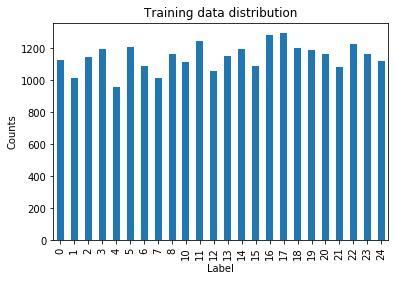

In [8]:
train_df['label'].value_counts().sort_index().plot("bar")
plt.title("Training data distribution")
plt.xlabel("Label")
plt.ylabel("Counts")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


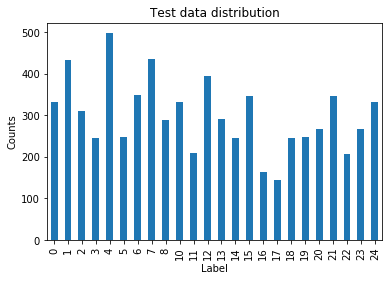

In [9]:
test_df['label'].value_counts().sort_index().plot("bar")
plt.title("Test data distribution")
plt.xlabel("Label")
plt.ylabel("Counts")
plt.show()

For the training data, the number of classes is unbalanced, but they're generally similar to each other. For the test data, some of them have about 200 images, but the others have 500. 

### pre-process

The datasets are already split into the test set and training set. They're loaded into the data frames. 

1. Split the dataframe into the label column and features 
2. Reshape each image into 28 x 28 
3. Make them flatten (one-dimensional vectors of length 784)

In [0]:
def prep_data(df):     
    # dataset is csv file, label, pixel1, pixel2, ...., pixel784
    # each row is an image 

    # split them into the label and pixels 
    y = df['label']
    x = df.drop(columns=['label'])

    # re-shape each image to 28 x 28 and flatten
    x = np.array([img.reshape(28, 28).flatten() for img in x.values])

    return x, y 


In [0]:
train_x, train_y = prep_data(train_df) 
test_x, test_y = prep_data(test_df) 

In [12]:
print("{} train samples".format(len(train_x)))
print("{} test samples".format(len(test_x)))
print("{} unique labels".format(n_class))

27455 train samples
7172 test samples
24 unique labels


**Normalize the data**

In [0]:
train_x = train_x / 255
test_x = test_x / 255

In [14]:
print("img shape:", train_x[0].shape)

img shape: (784,)


### Training images 


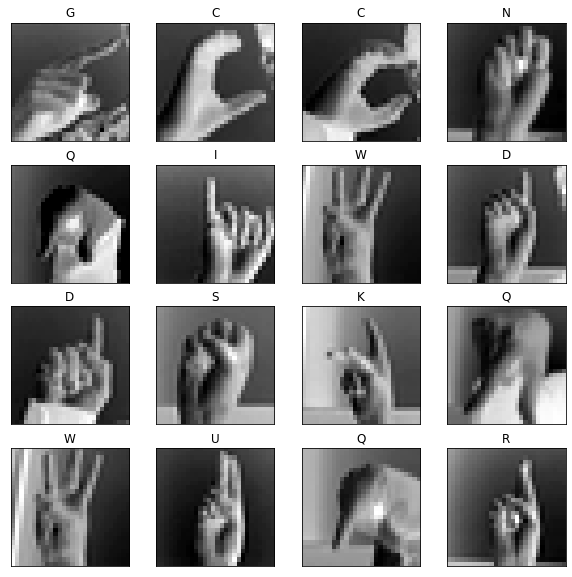

In [15]:
col, row = 4, 4

fig = plt.figure(figsize=(10, 10))

for i in range(1, col*row + 1): 
    fig.add_subplot(row, col, i)
    plt.imshow(train_x[i].reshape(28, 28), cmap = 'binary')
    plt.title(chr(train_y[i] + ord('A')))
    plt.xticks([])
    plt.yticks([])
plt.show() 

### Encode the labels
We convert a class vector to a binary class matrix

In [16]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
## encode the label (to make it like one-hot-encoding)
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

### Experiments with models

In [0]:
import keras
from keras.models import Sequential 
from keras.layers import Dense, Activation, Conv2D, Flatten, MaxPooling2D

from keras.optimizers import SGD, Adam

#### Model 1 
It's a two-layer model with 10 neurons with 784 inputs and uses the softmax as an activation.

In [19]:
model_base = Sequential() 
model_base.add(Dense(25, input_shape=(784,))) 
model_base.add(Activation('softmax')) 
model_base.summary()

model_base.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['categorical_accuracy'])




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                19625     
_________________________________________________________________
activation_1 (Activation)    (None, 25)                0         
Total params: 19,625
Trainable params: 19,625
Non-trainable params: 0
_________________________________________________________________




In [20]:
hist_model_base = model_base.fit(train_x, train_y, batch_size=128, epochs=200, validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 21964 samples, validate on 5491 samples
Epoch 1/200





21964/21964 [==============================] - 10s 466us/step - loss: 3.1111 - categorical_accuracy: 0.1093 - val_loss: 2.9877 - val_categorical_accuracy: 0.1663
Epoch 2/200
21964/21964 [==============================] - 1s 28us/step - loss: 2.8957 - categorical_accuracy: 0.2228 - val_loss: 2.8011 - val_categorical_accuracy: 0.2810
Epoch 3/200
21964/21964 [==============================] - 1s 27us/step - loss: 2.7281 - categorical_accuracy: 0.3309 - val_loss: 2.6458 - val_categorical_accuracy: 0.3713
Epoch 4/200
21964/21964 [==============================] - 1s 28us/step - loss: 2.5870 - categorical_accuracy: 0.3995 - val_loss: 2.5074 - val_categorical_accuracy: 0.4622
Epoch 5/200
21964/21964 [==============================] - 1s 30us/step - loss: 2.4676 - categorical_accuracy: 0.4439 - val_loss: 2.3974 - val_categorical_accu

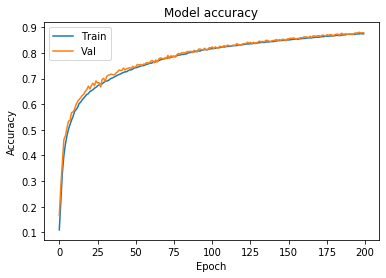

In [21]:
plt.plot(hist_model_base.history['categorical_accuracy'], label="Train")
plt.plot(hist_model_base.history['val_categorical_accuracy'], label="Val")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

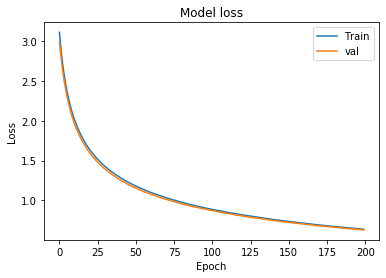

In [22]:
plt.plot(hist_model_base.history['loss'], label="Train")
plt.plot(hist_model_base.history['val_loss'], label="val")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

In [23]:
test_loss, test_acc = model_base.evaluate(test_x, test_y)
print("test_loss:{}".format(test_loss))
print("test_acc: {}".format(test_acc))

7172/7172 [==============================] - 0s 43us/step
test_loss:1.0939097605267518
test_acc: 0.6767986614612381


**Experiments**: batch size 

We use the same model to train the above model with different batch sizes. We use SGD for the optimizer. 

In [0]:
def fit_base_model(train_x, train_y, test_x, test_y, n_batch, opt):

    ## create a model 
    model = Sequential() 
    model.add(Dense(25, input_shape=(784,))) 
    model.add(Activation('softmax')) 

    model.compile(loss='categorical_crossentropy', optimizer=opt(), metrics=['categorical_accuracy'])

    # train the model 
    # 
    hist_model = model.fit(train_x, train_y, batch_size=n_batch, epochs=75, validation_split=0.2, verbose=1) 

    test_loss, test_acc = model.evaluate(test_x, test_y)
    return hist_model, test_loss, test_acc 

In [28]:
from time import time 

batch_sizes = [4, 8, 16, 32, 64, 128, 256, 512]
test_results = {}

for batch_size in batch_sizes: 
    start_time = time()
    hist_model, test_loss, test_acc  = fit_base_model(train_x, train_y, test_x, test_y, batch_size, SGD)
    training_time = time() - start_time
    test_results[batch_size] = {
        "hist": hist_model, 
        "loss": test_loss, 
        "acc": test_acc, 
        "time": training_time
    }

Train on 21964 samples, validate on 5491 samples
Epoch 1/75
21964/21964 [==============================] - 16s 726us/step - loss: 2.0729 - categorical_accuracy: 0.4064 - val_loss: 1.4481 - val_categorical_accuracy: 0.6205
Epoch 2/75
21964/21964 [==============================] - 16s 726us/step - loss: 1.3222 - categorical_accuracy: 0.6359 - val_loss: 1.1211 - val_categorical_accuracy: 0.7146
Epoch 3/75
21964/21964 [==============================] - 17s 764us/step - loss: 1.0688 - categorical_accuracy: 0.7114 - val_loss: 0.9313 - val_categorical_accuracy: 0.7638
Epoch 4/75
21964/21964 [==============================] - 16s 731us/step - loss: 0.9186 - categorical_accuracy: 0.7599 - val_loss: 0.8455 - val_categorical_accuracy: 0.7722
Epoch 5/75
21964/21964 [==============================] - 16s 727us/step - loss: 0.8171 - categorical_accuracy: 0.7919 - val_loss: 0.7964 - val_categorical_accuracy: 0.7751
Epoch 6/75
21964/21964 [==============================] - 16s 742us/step - loss: 0.738

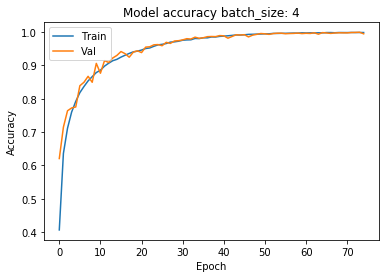

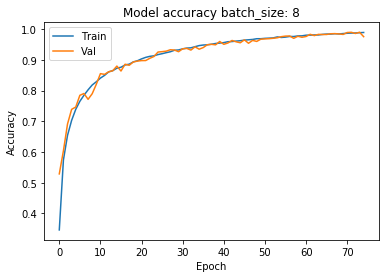

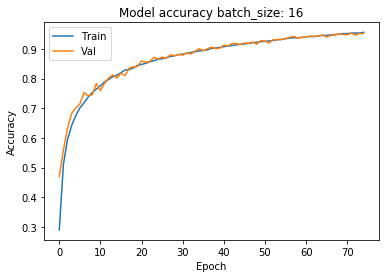

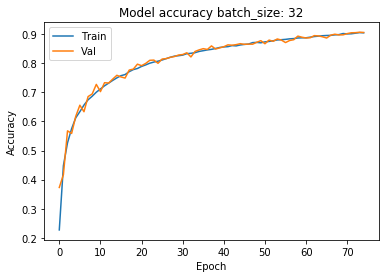

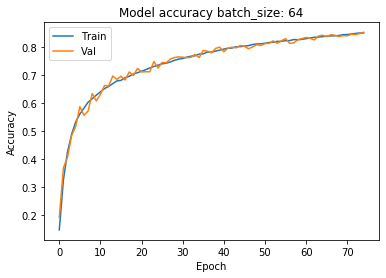

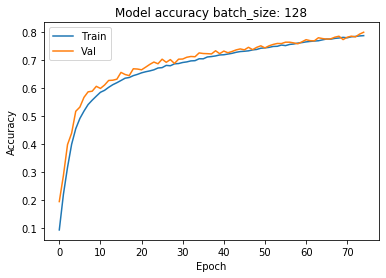

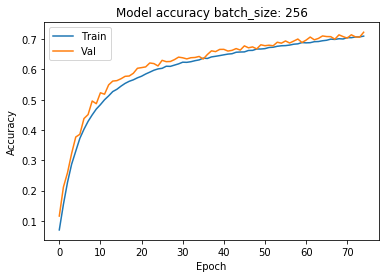

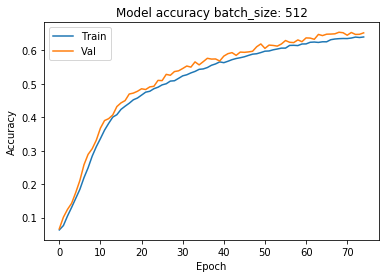

In [43]:
test_acces = []
test_losses = []
training_times = [] 


for batch_size, result in test_results.items(): 
    ## show training accuracy 
    hist = result['hist']

    test_acces.append(result['acc'])
    test_losses.append(result['loss'])
    training_times.append(result['time'])

    plt.plot(hist.history['categorical_accuracy'], label="Train")
    plt.plot(hist.history['val_categorical_accuracy'], label="Val")

    info = "batch_size: {}".format(batch_size)
    plt.title('Model accuracy {}'.format(info))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
  

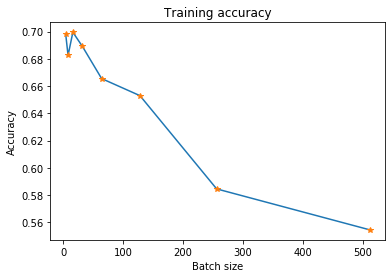

In [61]:
plt.plot(batch_sizes, test_acces)
plt.plot(batch_sizes, test_acces, "*")
plt.title("Training accuracy")
plt.xlabel("Batch size")
plt.ylabel("Accuracy")
plt.show()

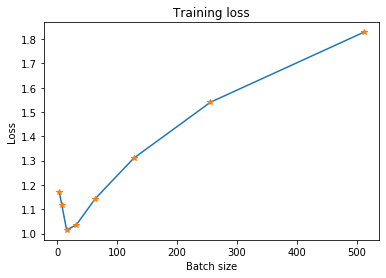

In [60]:
plt.plot(batch_sizes, test_losses)
plt.plot(batch_sizes, test_losses, "*")
plt.title("Training loss")
plt.xlabel("Batch size")
plt.ylabel("Loss")
plt.show()

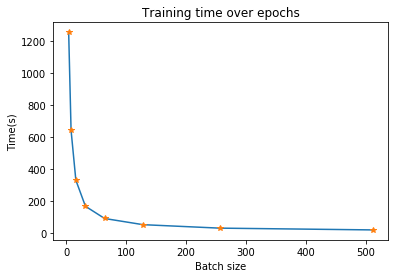

In [59]:
plt.plot(batch_sizes, training_times)
plt.plot(batch_sizes, training_times, "*")
plt.title("Training time over epochs")
plt.xlabel("Batch size")
plt.ylabel("Time(s)")
plt.show()

In [82]:
print("{} | {} | {} | {} |".format("batch size", "test acc", "test loss", "time"))
print("-"*42)
for i in range(len(batch_sizes)):
    print("{:>10} | {:>8.5f} | {:>9.5f} | {:>4.0f} | ".format(batch_sizes[i], test_acces[i], test_losses[i], training_times[i]))

batch size | test acc | test loss | time |
------------------------------------------
         4 |  0.69827 |   1.16902 | 1255 | 
         8 |  0.68252 |   1.11752 |  641 | 
        16 |  0.69953 |   1.01501 |  330 | 
        32 |  0.68907 |   1.03530 |  167 | 
        64 |  0.66550 |   1.14412 |   90 | 
       128 |  0.65296 |   1.30992 |   52 | 
       256 |  0.58450 |   1.54018 |   30 | 
       512 |  0.55438 |   1.82820 |   19 | 


We trained the base model for 75 epochs with different batch sizes. Here are some observations: 
* The curve for training and validation accuracy for each epoch is more smooth if the batch size is smaller.  
* If the batch size is too small, it takes more time to train. 
* If the batch size is too large, the training time is short, but it does not help to train the model (loss is still high and accuracy is low).

By considering the trade-off between the time, accuracy, and loss, probably batch size 128 would be good. It does not take much time to train, but still, we can get low loss test loss and high accuracy. 

In [0]:
model_results = {} 

**Experiments**: layers

For the model below (model 2 - 4), we create different models with a different number of layers and see which one works better. We use the `categorical_accuracy` as a metric. The batch size is 128, based on the previous experiments. We use Adam as an optimizer for now. 

#### Model 2
We add one layer of the convolutional layer with a max pooling. 

In [0]:
x_test = test_x.reshape(len(test_x), 28, 28, 1)
x_train = train_x.reshape(len(train_x), 28, 28, 1)

In [0]:
def plot_train_hist(hist, info=""): 

    ## show training accuracy 
    plt.plot(hist.history['categorical_accuracy'], label="Train")
    plt.plot(hist.history['val_categorical_accuracy'], label="Val")
    plt.title('Model accuracy {}'.format(info))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    ## show training loss 
    plt.plot(hist.history['loss'], label="Train")
    plt.plot(hist.history['val_loss'], label="val")
    plt.title('Model loss {}'.format(info))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()



In [140]:
model_layer = Sequential() 

model_layer.add(Conv2D(64, kernel_size=(3, 3), input_shape=(28,28,1))) 
model_layer.add(MaxPooling2D(pool_size=(2, 2))) 

model_layer.add(Flatten())
model_layer.add(Dense(128, activation='relu')) 
model_layer.add(Dense(25, activation='softmax')) 
model_layer.summary()

model_layer.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['categorical_accuracy'])

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 10816)             0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)               1384576   
_________________________________________________________________
dense_46 (Dense)             (None, 25)                3225      
Total params: 1,388,441
Trainable params: 1,388,441
Non-trainable params: 0
_________________________________________________________________


In [141]:
hist_model_layer = model_layer.fit(x_train, train_y, batch_size=128, epochs=20, validation_split=0.2)

Train on 21964 samples, validate on 5491 samples
Epoch 1/20
21964/21964 [==============================] - 3s 125us/step - loss: 1.9891 - categorical_accuracy: 0.4202 - val_loss: 1.0790 - val_categorical_accuracy: 0.6917
Epoch 2/20
21964/21964 [==============================] - 1s 58us/step - loss: 0.8337 - categorical_accuracy: 0.7614 - val_loss: 0.5860 - val_categorical_accuracy: 0.8275
Epoch 3/20
21964/21964 [==============================] - 1s 57us/step - loss: 0.4509 - categorical_accuracy: 0.8844 - val_loss: 0.3303 - val_categorical_accuracy: 0.9213
Epoch 4/20
21964/21964 [==============================] - 1s 57us/step - loss: 0.2520 - categorical_accuracy: 0.9483 - val_loss: 0.1705 - val_categorical_accuracy: 0.9721
Epoch 5/20
21964/21964 [==============================] - 1s 58us/step - loss: 0.1356 - categorical_accuracy: 0.9810 - val_loss: 0.0948 - val_categorical_accuracy: 0.9951
Epoch 6/20
21964/21964 [==============================] - 1s 56us/step - loss: 0.0757 - categor

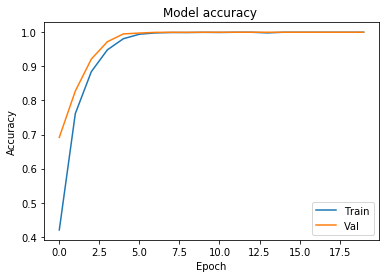

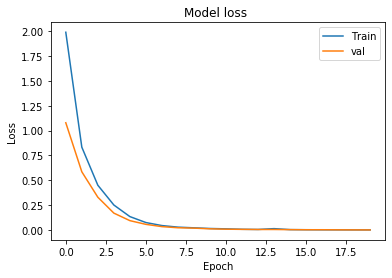

In [142]:
plot_train_hist(hist_model_layer)

In [145]:
test_loss, test_acc = model_layer.evaluate(x_test, test_y)
model_results["layer_1"] = (test_loss, test_acc)
print("test_loss:{}".format(test_loss))
print("test_acc: {}".format(test_acc))

7172/7172 [==============================] - 0s 68us/step
test_loss:1.0319985560731306
test_acc: 0.795175683212493


#### Model 3
We add one more layer of the convolutional layer with a max pooling. 

In [137]:
model_layers_2 = Sequential() 

model_layers_2.add(Conv2D(64, kernel_size=(3, 3), input_shape=(28,28,1))) 
model_layers_2.add(MaxPooling2D(pool_size=(2, 2))) 

model_layers_2.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) 
model_layers_2.add(MaxPooling2D(pool_size=(2, 2))) 

model_layers_2.add(Flatten())
model_layers_2.add(Dense(128, activation='relu')) 
model_layers_2.add(Dense(25, activation='softmax')) 
model_layers_2.summary()

model_layers_2.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['categorical_accuracy'])

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_44 (Dense)             (None, 25)              

In [138]:
hist_model_layers_2 = model_layers_2.fit(x_train, train_y, batch_size=128, epochs=20, validation_split=0.2)

Train on 21964 samples, validate on 5491 samples
Epoch 1/20
21964/21964 [==============================] - 3s 130us/step - loss: 1.7814 - categorical_accuracy: 0.4789 - val_loss: 0.6771 - val_categorical_accuracy: 0.8095
Epoch 2/20
21964/21964 [==============================] - 1s 62us/step - loss: 0.4189 - categorical_accuracy: 0.8804 - val_loss: 0.1954 - val_categorical_accuracy: 0.9608
Epoch 3/20
21964/21964 [==============================] - 1s 63us/step - loss: 0.1239 - categorical_accuracy: 0.9753 - val_loss: 0.0562 - val_categorical_accuracy: 0.9945
Epoch 4/20
21964/21964 [==============================] - 1s 61us/step - loss: 0.0392 - categorical_accuracy: 0.9967 - val_loss: 0.0262 - val_categorical_accuracy: 0.9960
Epoch 5/20
21964/21964 [==============================] - 1s 63us/step - loss: 0.0147 - categorical_accuracy: 0.9996 - val_loss: 0.0090 - val_categorical_accuracy: 1.0000
Epoch 6/20
21964/21964 [==============================] - 1s 65us/step - loss: 0.0074 - categor

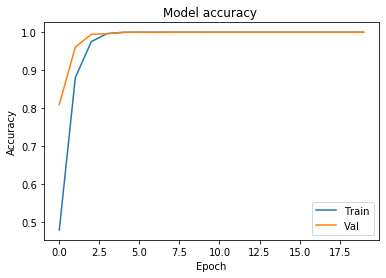

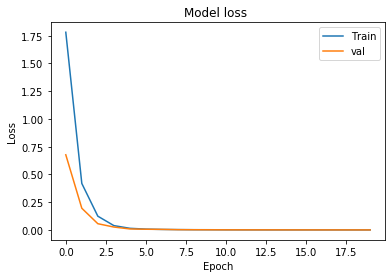

In [139]:
plot_train_hist(hist_model_layers_2)

In [146]:
test_loss, test_acc = model_layers_2.evaluate(x_test, test_y)
model_results["layer_2"] = (test_loss, test_acc)
print("test_loss:{}".format(test_loss))
print("test_acc: {}".format(test_acc))

7172/7172 [==============================] - 0s 67us/step
test_loss:0.5367349062736442
test_acc: 0.9107640825432236


#### Model 4
We add one more layer of the convolutional layer with a max pooling. This model has the total of 3 convolutional and max poolings

In [134]:
model_layers_3 = Sequential() 

model_layers_3.add(Conv2D(64, kernel_size=(3, 3), input_shape=(28,28,1))) 
model_layers_3.add(MaxPooling2D(pool_size=(2, 2))) 

model_layers_3.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) 
model_layers_3.add(MaxPooling2D(pool_size=(2, 2))) 

model_layers_3.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) 
model_layers_3.add(MaxPooling2D(pool_size=(2, 2))) 

model_layers_3.add(Flatten())
model_layers_3.add(Dense(128, activation='relu')) 
model_layers_3.add(Dense(25, activation='softmax')) 
model_layers_3.summary()

model_layers_3.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['categorical_accuracy'])

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 64)              

In [135]:
hist_model_layers_3 = model_layers_3.fit(x_train, train_y, batch_size=128, epochs=20, validation_split=0.2)

Train on 21964 samples, validate on 5491 samples
Epoch 1/20
21964/21964 [==============================] - 3s 129us/step - loss: 2.4516 - categorical_accuracy: 0.2574 - val_loss: 1.4502 - val_categorical_accuracy: 0.5460
Epoch 2/20
21964/21964 [==============================] - 1s 65us/step - loss: 1.0728 - categorical_accuracy: 0.6573 - val_loss: 0.7677 - val_categorical_accuracy: 0.7512
Epoch 3/20
21964/21964 [==============================] - 1s 63us/step - loss: 0.6013 - categorical_accuracy: 0.8013 - val_loss: 0.4345 - val_categorical_accuracy: 0.8594
Epoch 4/20
21964/21964 [==============================] - 1s 64us/step - loss: 0.3616 - categorical_accuracy: 0.8824 - val_loss: 0.2603 - val_categorical_accuracy: 0.9166
Epoch 5/20
21964/21964 [==============================] - 1s 65us/step - loss: 0.2048 - categorical_accuracy: 0.9392 - val_loss: 0.1588 - val_categorical_accuracy: 0.9585
Epoch 6/20
21964/21964 [==============================] - 1s 67us/step - loss: 0.1295 - categor

In [147]:
test_loss, test_acc = model_layers_3.evaluate(x_test, test_y)
model_results["layer_3"] = (test_loss, test_acc)
print("test_loss:{}".format(test_loss))
print("test_acc: {}".format(test_acc))

7172/7172 [==============================] - 1s 79us/step
test_loss:0.6372720230659299
test_acc: 0.86781929726715


In [158]:
print("| {}   | {} | {} |".format("model", "Test loss", "Test acc"))
print("-"*34)
for model, result in model_results.items(): 
    print("| {} | {:>9.5f} | {:>9.5f}|".format(model, result[0], result[1]))

| model   | Test loss | Test acc |
----------------------------------
| layer_1 |   1.03200 |   0.79518|
| layer_2 |   0.53673 |   0.91076|
| layer_3 |   0.63727 |   0.86782|


We created different models with different numbers of convolutional layers and pooling layers. Based on the small experiments, the model with 2 layers of convolutional layers and pooling layers works well.

In [0]:
from keras.optimizers import SGD, RMSprop, Adadelta, Adam 

In [0]:
def train_model(train_x, train_y, test_x, test_y, n_batch, opt):

    ## create a model 
    model = Sequential() 

    model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(28,28,1))) 
    model.add(MaxPooling2D(pool_size=(2, 2))) 

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) 
    model.add(MaxPooling2D(pool_size=(2, 2))) 

    model.add(Flatten())
    model.add(Dense(128, activation='relu')) 
    model.add(Dense(25, activation='softmax')) 

    model.compile(loss='categorical_crossentropy', optimizer=opt(), metrics=['categorical_accuracy'])

    # train the model 
    # 
    hist_model = model.fit(train_x, train_y, batch_size=n_batch, epochs=20, validation_split=0.2, verbose=1) 

    test_loss, test_acc = model.evaluate(test_x, test_y)
    return hist_model, test_loss, test_acc 

In [167]:
opt_results = {} 
opts = [SGD, RMSprop, Adadelta, Adam]

for opt in opts: 
    start_time = time()
    hist_model, test_loss, test_acc  = train_model(x_train, train_y, x_test, test_y, 128, opt)
    training_time = time() - start_time
    opt_results[opt.__name__] = {
        "hist": hist_model, 
        "loss": test_loss, 
        "acc": test_acc, 
        "time": training_time
    }

Train on 21964 samples, validate on 5491 samples
Epoch 1/20
21964/21964 [==============================] - 3s 129us/step - loss: 3.1890 - categorical_accuracy: 0.0499 - val_loss: 3.1708 - val_categorical_accuracy: 0.0448
Epoch 2/20
21964/21964 [==============================] - 1s 53us/step - loss: 3.1454 - categorical_accuracy: 0.0731 - val_loss: 3.1195 - val_categorical_accuracy: 0.0914
Epoch 3/20
21964/21964 [==============================] - 1s 55us/step - loss: 3.0728 - categorical_accuracy: 0.1422 - val_loss: 3.0022 - val_categorical_accuracy: 0.2187
Epoch 4/20
21964/21964 [==============================] - 1s 59us/step - loss: 2.8539 - categorical_accuracy: 0.2349 - val_loss: 2.6265 - val_categorical_accuracy: 0.2608
Epoch 5/20
21964/21964 [==============================] - 1s 54us/step - loss: 2.4194 - categorical_accuracy: 0.2879 - val_loss: 2.2359 - val_categorical_accuracy: 0.3305
Epoch 6/20
21964/21964 [==============================] - 1s 57us/step - loss: 2.0576 - categor

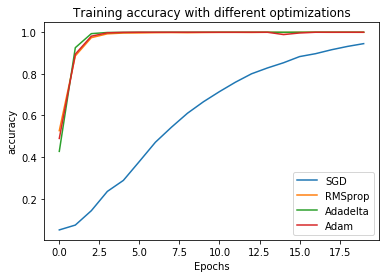

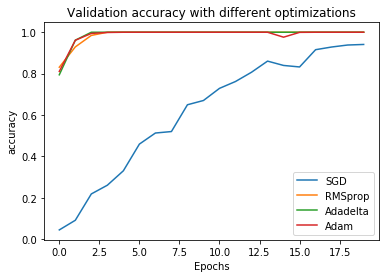

In [176]:
def plot_training_hist(item): 
    for opt, result in opt_results.items(): 
        hist = result['hist'] 
        plt.plot(hist.history[item], label=opt)
    plt.xlabel("Epochs")
    plt.ylabel("accuracy")
    plt.legend()

plot_training_hist("categorical_accuracy")
plt.title("Training accuracy with different optimizations")
plt.show()

plot_training_hist("val_categorical_accuracy")
plt.title("Validation accuracy with different optimizations")
plt.show()

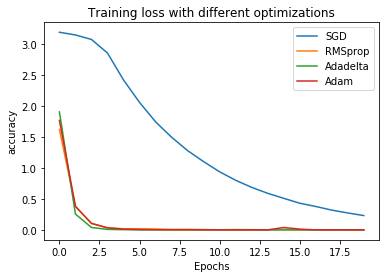

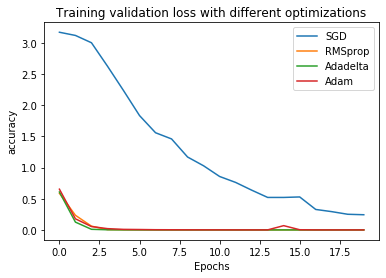

In [177]:
plot_training_hist("loss")
plt.title("Training loss with different optimizations")
plt.show()

plot_training_hist("val_loss")
plt.title("Training validation loss with different optimizations")
plt.show()

SGD has slower curves comparing to the other optimizers. The other optimizers have very similar curves while training the models

In [199]:
print("| {:8} | {} | {}  | {} |".format("model", "Test loss", "Test acc", "Time(s)"))
print("-"*46)
for opt, result in opt_results.items(): 
    print("| {:8} | {:>9.5f} | {:>9.5f} | {:>7.0f} |".format(opt, result["loss"], result["acc"], result["time"]))

| model    | Test loss | Test acc  | Time(s) |
----------------------------------------------
| SGD      |   0.59880 |   0.80940 |      27 |
| RMSprop  |   0.42711 |   0.93377 |      28 |
| Adadelta |   0.45041 |   0.91634 |      29 |
| Adam     |   0.37033 |   0.92289 |      30 |


Based on the table, the model trained with RMSprop performed good among the other optimizations. 

### Final model 
We train the model one more time to plot a confusion matrix. 

In [201]:
final_model = Sequential() 

final_model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(28,28,1))) 
final_model.add(MaxPooling2D(pool_size=(2, 2))) 

final_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) 
final_model.add(MaxPooling2D(pool_size=(2, 2))) 

final_model.add(Flatten())
final_model.add(Dense(128, activation='relu')) 
final_model.add(Dense(25, activation='softmax')) 

final_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['categorical_accuracy'])

# train the final_model 
# 
hist_final_model = final_model.fit(x_train, train_y, batch_size=128, epochs=20, validation_split=0.2, verbose=1) 

test_loss, test_acc = final_model.evaluate(x_test, test_y)

Train on 21964 samples, validate on 5491 samples
Epoch 1/20
21964/21964 [==============================] - 3s 145us/step - loss: 1.5455 - categorical_accuracy: 0.5478 - val_loss: 0.7525 - val_categorical_accuracy: 0.7443
Epoch 2/20
21964/21964 [==============================] - 1s 58us/step - loss: 0.3366 - categorical_accuracy: 0.8993 - val_loss: 0.2481 - val_categorical_accuracy: 0.9117
Epoch 3/20
21964/21964 [==============================] - 1s 61us/step - loss: 0.0980 - categorical_accuracy: 0.9752 - val_loss: 0.0180 - val_categorical_accuracy: 0.9996
Epoch 4/20
21964/21964 [==============================] - 1s 62us/step - loss: 0.0346 - categorical_accuracy: 0.9934 - val_loss: 0.0033 - val_categorical_accuracy: 1.0000
Epoch 5/20
21964/21964 [==============================] - 1s 58us/step - loss: 0.0277 - categorical_accuracy: 0.9954 - val_loss: 0.0039 - val_categorical_accuracy: 1.0000
Epoch 6/20
21964/21964 [==============================] - 1s 62us/step - loss: 0.0168 - categor

In [0]:
y_pred = final_model.predict(x_test)

y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_y, axis=1)

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sea
from string import ascii_lowercase

In [0]:
cm = confusion_matrix(y_true, y_pred, normalize='true')

In [0]:
labels = ascii_lowercase.replace("j", "").replace("z", "")
labels = list(labels)

df_cm = pd.DataFrame(cm, index=labels, columns=labels, )

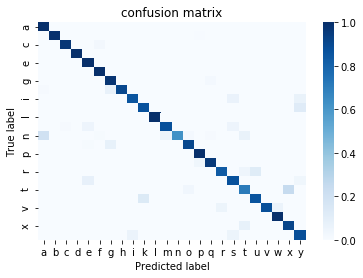

In [245]:
sea.heatmap(df_cm, annot=False, cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("confusion matrix")
plt.show()

It seems that the model can classify the images, but it's not good at "m" and "n" and "s" and "t". If we check the actual sign, they're very similar to each other. 